In [56]:
# Importing dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress

In [57]:
# Importing csv files
visa_df = pd.read_csv('ABS_NOM_VISA.csv')
age_gender_df = pd.read_csv('ABS_NOM_AGE-GENDER.csv')
visa_df.head()


,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
1,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2006,3630,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
2,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2007,7130,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
3,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2008,10130,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
4,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2009,20180,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June


In [58]:
# Creating pivot table for visa_df

table1 = visa_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table1

,OBS_VALUE
REGION: Region,
1: New South Wales,7666070
2: Victoria,5970350
3: Queensland,3821850
4: South Australia,1127480
5: Western Australia,2583950
6: Tasmania,204280
7: Northern Territory,245780
8: Australian Capital Territory,391610
AUS: Australia,22011150


In [59]:
#Dropping any rows that contain the word 'Total'
rows_to_drop = visa_df[visa_df['MEASURE: Type of Visa'].str.contains('Total')].index
updated_visa_df = visa_df.drop(rows_to_drop)
# Updated pivot table
table2 = updated_visa_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table2

,OBS_VALUE
REGION: Region,
1: New South Wales,2788380
2: Victoria,2159460
3: Queensland,1461430
4: South Australia,403270
5: Western Australia,951890
6: Tasmania,75140
7: Northern Territory,94870
8: Australian Capital Territory,146930
AUS: Australia,8080740


In [60]:
# create a table to display number of arrivals based on the visa category and time period
visa_array = updated_visa_df['MEASURE: Type of Visa'].unique()
i = 1

visa_bracket_dict = {}
for i, visa in enumerate(visa_array):
    visa_bracket = updated_visa_df[updated_visa_df['MEASURE: Type of Visa'] == visa]
    visa_bracket1 = visa_bracket.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
    visa_bracket_dict[visa] = visa_bracket1

v_df = pd.DataFrame(visa_bracket_dict)
v_df

,2: Temporary visa - Vocational Education and Training sector,4: Temporary visa - Student other,5: Temporary visa - Temporary work (skilled),6: Temporary visa - Visitor,7: Temporary visa - Working Holiday,8: Temporary visa - Other temporary visas,12: Permanent visa - Special Eligibility and humanitarian,14: Australian Citizen,3: Temporary visa - Higher education sector,10: Permanent visa - Family,11: Permanent visa - Skill,13: New Zealand Citizen (subclass 444),15: Permanent visa - Other permanent visas,17: Other Visas
TIME_PERIOD: Time Period,,,,,,,,,,,,,,
2005,15970,50900,34190,71540,25860,18650,27160,138520,65510,56870,71090,74660,7310,24610
2006,20990,41110,55460,72200,34170,15170,24640,145220,84090,60800,85500,77500,7280,28950
2007,39960,51620,71700,75200,43260,13560,24810,150600,115880,64970,95090,88850,7540,31910
2008,62840,58320,88020,99990,58240,13850,18960,151670,146300,66200,103190,103360,7880,23920
2009,107150,54220,88120,84680,68610,11450,23260,160870,144150,70120,96720,93770,8000,28460
2010,51420,48910,52540,80510,66070,10660,19840,157750,113010,71180,82280,77260,7980,36450
2011,22000,42660,71200,83430,86930,12910,18360,157750,86040,67470,66120,107240,8650,32860
2012,20320,42490,95770,85450,109240,14210,15400,152140,83750,69540,81970,122150,8510,33820
2013,16920,42520,86920,95840,118500,14450,17080,154210,113000,70490,76050,108240,9930,40130


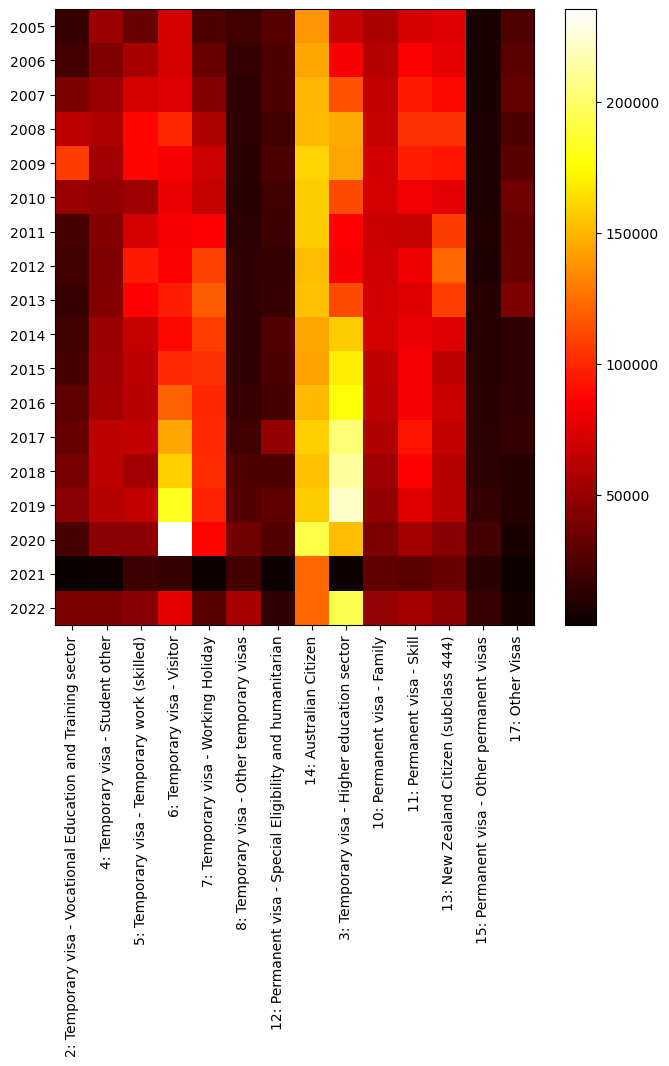

In [61]:
# Heatmap to show trends in the above table
plt.figure(figsize=(8, 8))
plt.imshow(v_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(v_df.columns)), v_df.columns, rotation = 90)
plt.yticks(range(len(v_df.index)), v_df.index)
plt.show()

Temporary visa - Higher education sector has been a popular category since the year 2014 and the trend continues to be the same even after covid

In [62]:
age_gender_df.head()

,DATAFLOW,MEASURE: Measure,AGE: Age,SEX: Sex,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2005,1570,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
1,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2006,2080,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
2,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2007,2760,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
3,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2008,2890,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
4,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2009,3230,NUM: Number,NaN,NaN,30-6: Year Ending 30 June


In [63]:
table3 = age_gender_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table3

,OBS_VALUE
REGION: Region,
1: New South Wales,11153920
2: Victoria,8638130
3: Queensland,5846370
4: South Australia,1613320
5: Western Australia,3807790
6: Tasmania,300480
7: Northern Territory,379540
8: Australian Capital Territory,588050
AUS: Australia,32323700


In [64]:
#Dropping any rows that contain Totals and applying filter to only keep data related to 'arrivals'
age_gender_df = age_gender_df.loc[age_gender_df['MEASURE: Measure'] == '1: NOM arrivals']
rows_to_drop2 = age_gender_df[age_gender_df['AGE: Age'].str.contains('TOT:')].index
updated_age_gender_df = age_gender_df.drop(rows_to_drop2)
# Updated pivot table
table4 = updated_age_gender_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table4

,OBS_VALUE
REGION: Region,
1: New South Wales,2788490
2: Victoria,2159690
3: Queensland,1461680
4: South Australia,403390
5: Western Australia,952070
6: Tasmania,75100
7: Northern Territory,94960
8: Australian Capital Territory,147070
AUS: Australia,8080980


In [65]:
updated_age_gender_df.head()

,DATAFLOW,MEASURE: Measure,AGE: Age,SEX: Sex,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
54,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2005,3990,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
55,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2006,4140,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
56,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2007,4010,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
57,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2008,4850,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
58,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2009,4580,NUM: Number,NaN,NaN,30-6: Year Ending 30 June


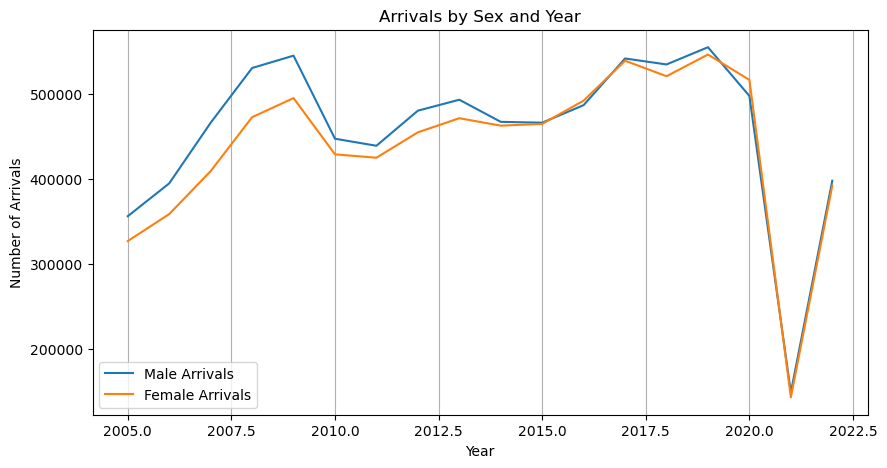

In [92]:

# filter the data for males and females separately
male_df = updated_age_gender_df[updated_age_gender_df['SEX: Sex'] == '1: Males']
female_df = updated_age_gender_df[updated_age_gender_df['SEX: Sex'] == '2: Females']

# group the data by year and sum the arrival numbers
male_arrivals = male_df.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
female_arrivals = female_df.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()

# create a line graph with both male and female arrivals
plt.figure(figsize=(10, 5))
plt.plot(male_arrivals.index, male_arrivals.values, label='Male Arrivals')
plt.plot(female_arrivals.index, female_arrivals.values, label='Female Arrivals')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals by Sex and Year')
plt.grid(axis='x')
plt.legend()
plt.show()


Prior to COVID number of Male arrivals was higher than number of Female arrivals leading up to 2014. Years 2015, 2016 the gap was almost non-existent, 2017 and 2018 it increased again making number of Male arrivals higher than Females. In 2020, number of Male arrivals dropped and number of Female arrivals increased for a small period and is now again going back to the original. 

In [67]:
age_array = updated_age_gender_df['AGE: Age'].unique()

<Figure size 1000x800 with 0 Axes>

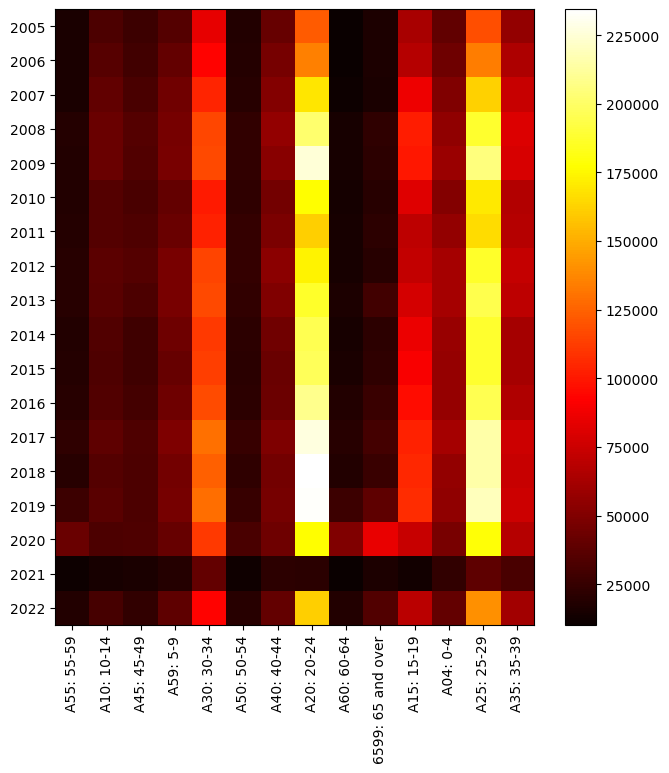

In [68]:
# create a table and draw a heatmap to show timeperiod on y-axis and different age brackets on x-axis
age_array = updated_age_gender_df['AGE: Age'].unique()
i = 1
plt.figure(figsize=(10, 8))
age_bracket_dict = {}
for i, age in enumerate(age_array):
    age_bracket = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == age]
    age_bracket1 = age_bracket.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
    #plt.plot(age_bracket1.index, age_bracket1.values, label=age)
    age_bracket_dict[age] = age_bracket1

df = pd.DataFrame(age_bracket_dict)

# plot the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation = 90)
plt.yticks(range(len(df.index)), df.index)
plt.show()

Overall 'A20: 20-24' is the most popular category followed by 'A25: 25-29', 'A30: 30-34' and 'A15: 15-19'
During years 2016 - 2019 we had the maximum number of arrivals
It appears that covid has made no impact on the age bracket and in the year 2022 the same trend continues as before covid

In [69]:
mf = pd.DataFrame({"Male": male_arrivals, "Female":female_arrivals})
merged_df = pd.merge(mf,df, on='TIME_PERIOD: Time Period')
#merged_df

In [70]:
# Prior to covid DF
age_before_covid = updated_age_gender_df.loc[updated_age_gender_df['TIME_PERIOD: Time Period']<=2020]['OBS_VALUE']

# After covid DF
age_after_covid = updated_age_gender_df.loc[updated_age_gender_df['TIME_PERIOD: Time Period']>2020]['OBS_VALUE']

# Independent ttest
stats.ttest_ind(age_before_covid, age_after_covid, equal_var=False)

Ttest_indResult(statistic=6.889103112023368, pvalue=1.0747455813994277e-11)

Null hyposthesis: covid has had no impact on the number of arrivals
Alternate hypothesis: covid has impacted on the number of arrivals i.e. reduced the number of migrants entering the country

Based on the P value we can conclude that our alternate hypothesis is correct i.e. covid has impacted on the number of arrivals i.e. reduced the number of migrants entering the country

In [71]:
#Male population entering in different regions per year
male_df
male_df_region1 = male_df.groupby(['TIME_PERIOD: Time Period','REGION: Region'])['OBS_VALUE'].sum()
male_df_region = male_df_region1.reset_index() 
male_df_region = male_df_region.pivot(index='TIME_PERIOD: Time Period', columns='REGION: Region', values='OBS_VALUE')
del male_df_region["AUS: Australia"]
male_df_region

REGION: Region,1: New South Wales,2: Victoria,3: Queensland,4: South Australia,5: Western Australia,6: Tasmania,7: Northern Territory,8: Australian Capital Territory
TIME_PERIOD: Time Period,,,,,,,,
2005,64730,41970,34230,8520,20930,1600,3190,2870
2006,68430,47510,38370,10560,25310,1720,2520,2950
2007,79100,58840,46150,11930,28910,1760,2930,3360
2008,90140,65480,52680,12900,35300,1980,2850,3840
2009,87250,70350,53820,14050,37100,2190,3420,4250
2010,72540,54900,43660,12500,31000,2050,2680,4270
2011,71340,51810,43230,9990,34900,1760,2720,3710
2012,70520,56310,48710,11610,42400,1930,3810,4820
2013,76630,60000,48740,11440,38630,1990,4770,4350


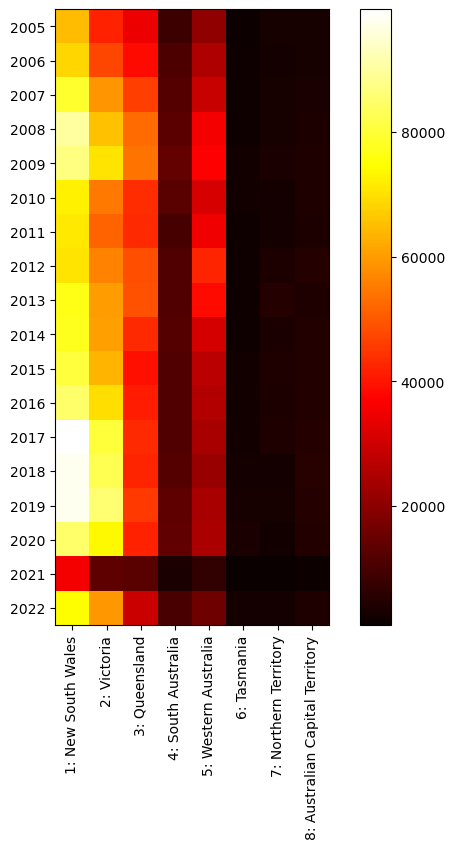

In [72]:
# plotting heatmap for the Male population entering in different regions per year
plt.figure(figsize=(8, 8))
plt.imshow(male_df_region, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(male_df_region.columns)), male_df_region.columns, rotation = 90)
plt.yticks(range(len(male_df_region.index)), male_df_region.index)
plt.show()

In [73]:
# Female population entering in different regions per year
female_df
female_df_region1 = female_df.groupby(['TIME_PERIOD: Time Period','REGION: Region'])['OBS_VALUE'].sum()
female_df_region = female_df_region1.reset_index() 
female_df_region = female_df_region.pivot(index='TIME_PERIOD: Time Period', columns='REGION: Region', values='OBS_VALUE')
del female_df_region["AUS: Australia"]
female_df_region

REGION: Region,1: New South Wales,2: Victoria,3: Queensland,4: South Australia,5: Western Australia,6: Tasmania,7: Northern Territory,8: Australian Capital Territory
TIME_PERIOD: Time Period,,,,,,,,
2005,60460,39300,31170,8100,19070,1560,1240,2520
2006,64320,42380,34720,10010,21880,1670,1430,2890
2007,71500,49760,40370,11590,24940,1670,1650,3060
2008,80820,57980,47000,12280,30840,1930,1870,3510
2009,81790,62340,49320,13210,32630,2120,2130,3980
2010,71680,54240,41260,12320,26940,1970,2000,4000
2011,70640,53130,41050,10170,30050,1720,2130,3560
2012,70360,55980,44500,11390,35610,1870,2960,4710
2013,76010,59270,44110,11190,35770,1940,3050,4340


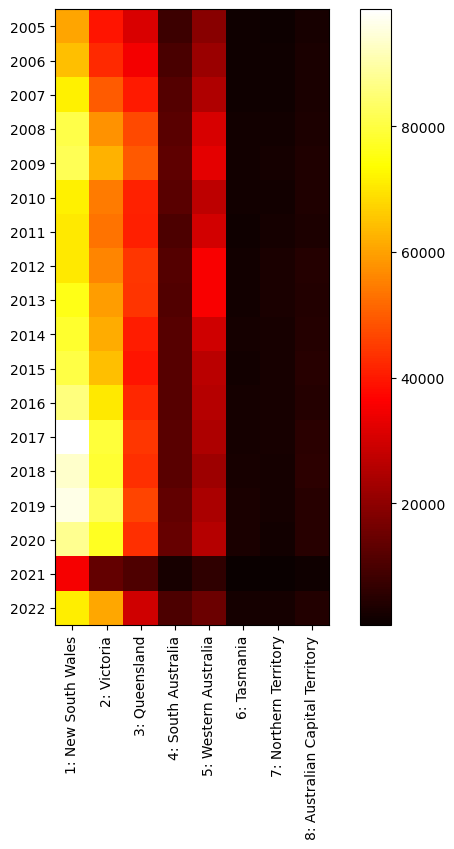

In [74]:
#  plotting heatmap for female population entering in different regions per year
plt.figure(figsize=(8, 8))
plt.imshow(female_df_region, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(female_df_region.columns)), female_df_region.columns, rotation = 90)
plt.yticks(range(len(female_df_region.index)), female_df_region.index)
plt.show()


In [75]:
# Prior to covid DF
age_before_covid = updated_age_gender_df.loc[updated_age_gender_df['TIME_PERIOD: Time Period']<=2020]

#age_before_covid

#Creating pivot table for number of people entering each region based on the age bracket before covid
age_before_covid1 = age_before_covid.groupby(['REGION: Region','AGE: Age'])['OBS_VALUE'].sum()
age_before_covid_df = age_before_covid1.reset_index() 
age_before_covid_df = age_before_covid_df.pivot(index='REGION: Region', columns='AGE: Age', values='OBS_VALUE')
age_before_covid_df = age_before_covid_df.drop(age_before_covid_df.index[-1])

age_before_covid_df


AGE: Age,6599: 65 and over,A04: 0-4,A10: 10-14,A15: 15-19,A20: 20-24,A25: 25-29,A30: 30-34,A35: 35-39,A40: 40-44,A45: 45-49,A50: 50-54,A55: 55-59,A59: 5-9,A60: 60-64
REGION: Region,,,,,,,,,,,,,,
1: New South Wales,83440,139800,83650,235910,525710,523660,315530,185460,120880,81940,62060,56530,105950,51560
2: Victoria,54450,112720,72330,212090,438160,389600,233290,138060,91690,60380,44290,41470,86640,36890
3: Queensland,38430,81640,61880,111390,276210,263280,153070,101690,72820,51210,37910,32600,70870,26640
4: South Australia,9660,24920,18310,40500,66760,63120,45350,31240,20770,12150,8100,7240,21780,6520
5: Western Australia,25070,59890,42680,67920,152550,168390,108590,76200,55220,36290,25500,21210,52120,16910
6: Tasmania,2120,4160,2820,5610,13080,13090,7970,5020,3550,2520,1910,1690,3330,1480
7: Northern Territory,1730,4660,3080,4550,16200,18830,11760,7800,5670,3850,2770,2100,3940,1600
8: Australian Capital Territory,3210,8650,5490,13470,24530,21290,16250,11680,8370,5610,3840,3320,7450,2610


In [76]:
age_before_covid_df.columns

Index(['6599: 65 and over', 'A04: 0-4', 'A10: 10-14', 'A15: 15-19',
       'A20: 20-24', 'A25: 25-29', 'A30: 30-34', 'A35: 35-39', 'A40: 40-44',
       'A45: 45-49', 'A50: 50-54', 'A55: 55-59', 'A59: 5-9', 'A60: 60-64'],
      dtype='object', name='AGE: Age')

In [77]:
rename_before_covid = {'6599: 65 and over':'bc_6599: 65 and over', 'A04: 0-4':'bc_A04: 0-4', 'A10: 10-14':'bc_A10: 10-14', 'A15: 15-19':'bc_A15: 15-19',
       'A20: 20-24':'bc_A20: 20-24', 'A25: 25-29':'bc_A25: 25-29', 'A30: 30-34':'bc_A30: 30-34', 'A35: 35-39':'bc_A35: 35-39', 'A40: 40-44':'bc_A40: 40-44',
       'A45: 45-49':'bc_A45: 45-49', 'A50: 50-54':'bc_A50: 50-54', 'A55: 55-59':'bc_A55: 55-59', 'A59: 5-9':'bc_A59: 5-9', 'A60: 60-64':'bc_A60: 60-64'}
age_before_covid_df = age_before_covid_df.rename(columns=rename_before_covid)
age_before_covid_df

AGE: Age,bc_6599: 65 and over,bc_A04: 0-4,bc_A10: 10-14,bc_A15: 15-19,bc_A20: 20-24,bc_A25: 25-29,bc_A30: 30-34,bc_A35: 35-39,bc_A40: 40-44,bc_A45: 45-49,bc_A50: 50-54,bc_A55: 55-59,bc_A59: 5-9,bc_A60: 60-64
REGION: Region,,,,,,,,,,,,,,
1: New South Wales,83440,139800,83650,235910,525710,523660,315530,185460,120880,81940,62060,56530,105950,51560
2: Victoria,54450,112720,72330,212090,438160,389600,233290,138060,91690,60380,44290,41470,86640,36890
3: Queensland,38430,81640,61880,111390,276210,263280,153070,101690,72820,51210,37910,32600,70870,26640
4: South Australia,9660,24920,18310,40500,66760,63120,45350,31240,20770,12150,8100,7240,21780,6520
5: Western Australia,25070,59890,42680,67920,152550,168390,108590,76200,55220,36290,25500,21210,52120,16910
6: Tasmania,2120,4160,2820,5610,13080,13090,7970,5020,3550,2520,1910,1690,3330,1480
7: Northern Territory,1730,4660,3080,4550,16200,18830,11760,7800,5670,3850,2770,2100,3940,1600
8: Australian Capital Territory,3210,8650,5490,13470,24530,21290,16250,11680,8370,5610,3840,3320,7450,2610


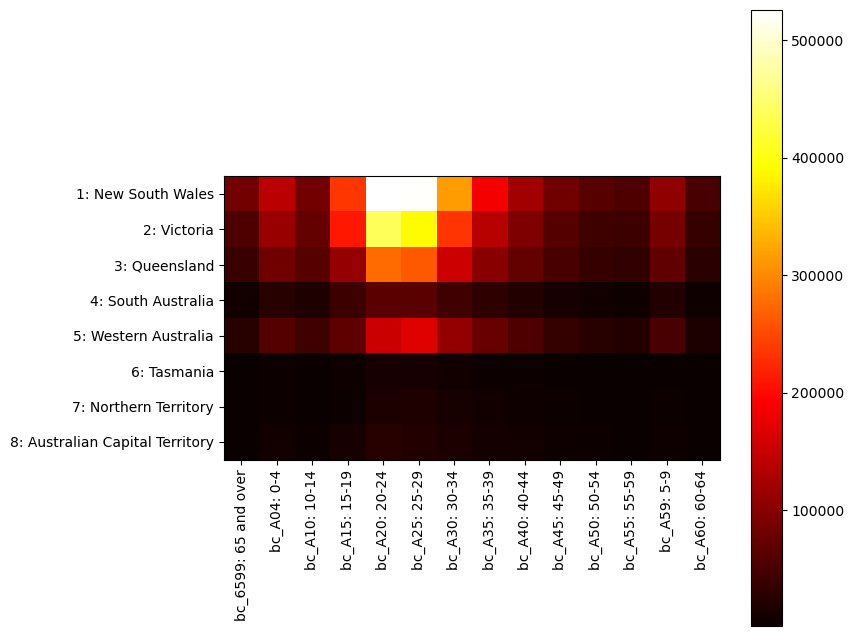

In [78]:
#Creating heatmap based on the pivot table for number of people entering each region based on the age bracket before covid
plt.figure(figsize=(8, 8))
plt.imshow(age_before_covid_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(age_before_covid_df.columns)), age_before_covid_df.columns, rotation = 90)
plt.yticks(range(len(age_before_covid_df.index)), age_before_covid_df.index)
plt.show()

In [79]:
# After covid DF
# Creating pivot table for number of people entering each region based on the age bracket after covid
age_after_covid = updated_age_gender_df.loc[updated_age_gender_df['TIME_PERIOD: Time Period']>2020]
age_after_covid1 = age_after_covid.groupby(['REGION: Region','AGE: Age'])['OBS_VALUE'].sum()
age_after_covid_df = age_after_covid1.reset_index() 
age_after_covid_df = age_after_covid_df.pivot(index='REGION: Region', columns='AGE: Age', values='OBS_VALUE')
age_after_covid_df = age_after_covid_df.drop(age_after_covid_df.index[-1])
age_after_covid_df

AGE: Age,6599: 65 and over,A04: 0-4,A10: 10-14,A15: 15-19,A20: 20-24,A25: 25-29,A30: 30-34,A35: 35-39,A40: 40-44,A45: 45-49,A50: 50-54,A55: 55-59,A59: 5-9,A60: 60-64
REGION: Region,,,,,,,,,,,,,,
1: New South Wales,10620,13010,8870,16600,37050,34840,26630,18530,12380,7920,6400,6100,11480,5980
2: Victoria,6390,8210,5890,12960,28600,25280,17630,11330,7630,4790,4150,3740,7220,3810
3: Queensland,4270,4680,3760,5080,12480,13870,10190,7280,4950,3450,2820,2400,4480,2330
4: South Australia,970,1580,1240,2400,4480,4270,3320,2580,1660,940,740,620,1590,580
5: Western Australia,2180,2990,2140,2660,4950,6630,5680,4360,3050,1910,1600,1400,2760,1220
6: Tasmania,180,360,210,290,1120,1420,1100,750,420,220,150,120,300,110
7: Northern Territory,170,430,340,360,770,1120,940,680,410,270,190,160,430,150
8: Australian Capital Territory,450,610,560,790,1870,1740,1370,990,710,470,390,350,730,270


In [80]:
rename_after_covid = {'6599: 65 and over':'ac_6599: 65 and over', 'A04: 0-4':'ac_A04: 0-4', 'A10: 10-14':'ac_A10: 10-14', 'A15: 15-19':'ac_A15: 15-19',
       'A20: 20-24':'ac_A20: 20-24', 'A25: 25-29':'ac_A25: 25-29', 'A30: 30-34':'ac_A30: 30-34', 'A35: 35-39':'ac_A35: 35-39', 'A40: 40-44':'ac_A40: 40-44',
       'A45: 45-49':'ac_A45: 45-49', 'A50: 50-54':'ac_A50: 50-54', 'A55: 55-59':'ac_A55: 55-59', 'A59: 5-9':'ac_A59: 5-9', 'A60: 60-64':'ac_A60: 60-64'}
age_after_covid_df = age_after_covid_df.rename(columns=rename_after_covid)
age_after_covid_df

AGE: Age,ac_6599: 65 and over,ac_A04: 0-4,ac_A10: 10-14,ac_A15: 15-19,ac_A20: 20-24,ac_A25: 25-29,ac_A30: 30-34,ac_A35: 35-39,ac_A40: 40-44,ac_A45: 45-49,ac_A50: 50-54,ac_A55: 55-59,ac_A59: 5-9,ac_A60: 60-64
REGION: Region,,,,,,,,,,,,,,
1: New South Wales,10620,13010,8870,16600,37050,34840,26630,18530,12380,7920,6400,6100,11480,5980
2: Victoria,6390,8210,5890,12960,28600,25280,17630,11330,7630,4790,4150,3740,7220,3810
3: Queensland,4270,4680,3760,5080,12480,13870,10190,7280,4950,3450,2820,2400,4480,2330
4: South Australia,970,1580,1240,2400,4480,4270,3320,2580,1660,940,740,620,1590,580
5: Western Australia,2180,2990,2140,2660,4950,6630,5680,4360,3050,1910,1600,1400,2760,1220
6: Tasmania,180,360,210,290,1120,1420,1100,750,420,220,150,120,300,110
7: Northern Territory,170,430,340,360,770,1120,940,680,410,270,190,160,430,150
8: Australian Capital Territory,450,610,560,790,1870,1740,1370,990,710,470,390,350,730,270


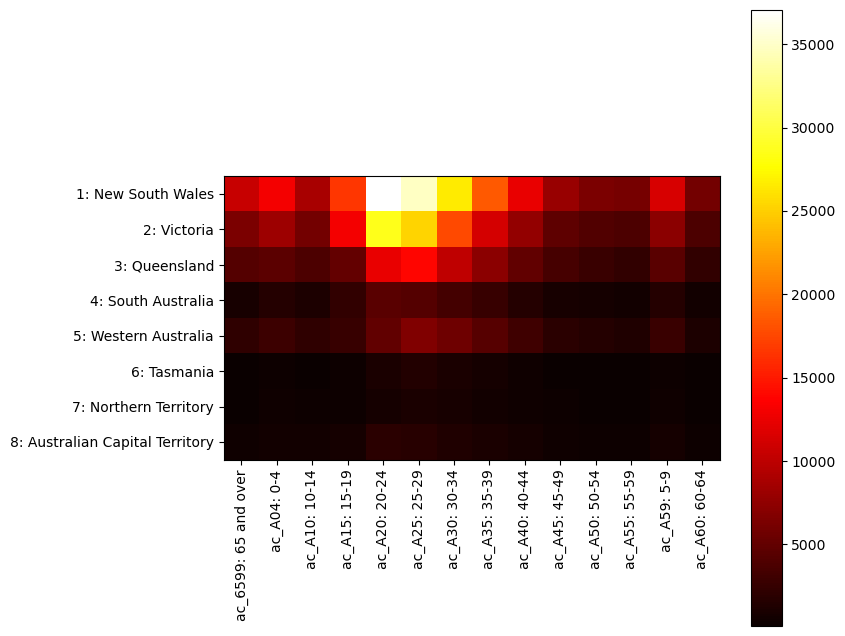

In [81]:
#Creating heatmap based on the pivot table for number of people entering each region based on the age bracket after covid
plt.figure(figsize=(8, 8))
plt.imshow(age_after_covid_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(age_after_covid_df.columns)), age_after_covid_df.columns, rotation = 90)
plt.yticks(range(len(age_after_covid_df.index)), age_after_covid_df.index)
plt.show()

In [82]:
# merged two dataframes
merged_age_df = pd.merge(age_before_covid_df, age_after_covid_df, left_index=True, right_index=True)
merged_age_df

AGE: Age,bc_6599: 65 and over,bc_A04: 0-4,bc_A10: 10-14,bc_A15: 15-19,bc_A20: 20-24,bc_A25: 25-29,bc_A30: 30-34,bc_A35: 35-39,bc_A40: 40-44,bc_A45: 45-49,bc_A50: 50-54,bc_A55: 55-59,bc_A59: 5-9,bc_A60: 60-64,ac_6599: 65 and over,ac_A04: 0-4,ac_A10: 10-14,ac_A15: 15-19,ac_A20: 20-24,ac_A25: 25-29,ac_A30: 30-34,ac_A35: 35-39,ac_A40: 40-44,ac_A45: 45-49,ac_A50: 50-54,ac_A55: 55-59,ac_A59: 5-9,ac_A60: 60-64
REGION: Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1: New South Wales,83440,139800,83650,235910,525710,523660,315530,185460,120880,81940,62060,56530,105950,51560,10620,13010,8870,16600,37050,34840,26630,18530,12380,7920,6400,6100,11480,5980
2: Victoria,54450,112720,72330,212090,438160,389600,233290,138060,91690,60380,44290,41470,86640,36890,6390,8210,5890,12960,28600,25280,17630,11330,7630,4790,4150,3740,7220,3810
3: Queensland,38430,81640,61880,111390,276210,263280,153070,101690,72820,51210,37910,32600,70870,26640,4270,4680,3760,5080,12480,13870,10190,7280,4950,3450,2820,2400,4480,2330
4: South Australia,9660,24920,18310,40500,66760,63120,45350,31240,20770,12150,8100,7240,21780,6520,970,1580,1240,2400,4480,4270,3320,2580,1660,940,740,620,1590,580
5: Western Australia,25070,59890,42680,67920,152550,168390,108590,76200,55220,36290,25500,21210,52120,16910,2180,2990,2140,2660,4950,6630,5680,4360,3050,1910,1600,1400,2760,1220
6: Tasmania,2120,4160,2820,5610,13080,13090,7970,5020,3550,2520,1910,1690,3330,1480,180,360,210,290,1120,1420,1100,750,420,220,150,120,300,110
7: Northern Territory,1730,4660,3080,4550,16200,18830,11760,7800,5670,3850,2770,2100,3940,1600,170,430,340,360,770,1120,940,680,410,270,190,160,430,150
8: Australian Capital Territory,3210,8650,5490,13470,24530,21290,16250,11680,8370,5610,3840,3320,7450,2610,450,610,560,790,1870,1740,1370,990,710,470,390,350,730,270


In [83]:
# correlation matriz based on the merged dataframe
correlation = merged_age_df.corr()
pd.set_option('display.max_columns', None)
correlation


AGE: Age,bc_6599: 65 and over,bc_A04: 0-4,bc_A10: 10-14,bc_A15: 15-19,bc_A20: 20-24,bc_A25: 25-29,bc_A30: 30-34,bc_A35: 35-39,bc_A40: 40-44,bc_A45: 45-49,bc_A50: 50-54,bc_A55: 55-59,bc_A59: 5-9,bc_A60: 60-64,ac_6599: 65 and over,ac_A04: 0-4,ac_A10: 10-14,ac_A15: 15-19,ac_A20: 20-24,ac_A25: 25-29,ac_A30: 30-34,ac_A35: 35-39,ac_A40: 40-44,ac_A45: 45-49,ac_A50: 50-54,ac_A55: 55-59,ac_A59: 5-9,ac_A60: 60-64
AGE: Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bc_6599: 65 and over,1.000000,0.986845,0.961946,0.977841,0.988135,0.996839,0.997110,0.993030,0.986191,0.985722,0.989090,0.993402,0.974400,0.997997,0.995130,0.993084,0.996450,0.969969,0.972070,0.988274,0.992623,0.994714,0.996103,0.996985,0.998189,0.995647,0.994988,0.994279
bc_A04: 0-4,0.986845,1.000000,0.991414,0.983046,0.991021,0.994061,0.994474,0.998543,0.998301,0.996180,0.995001,0.996853,0.996596,0.994079,0.968039,0.966420,0.976790,0.949646,0.950135,0.968547,0.967919,0.967683,0.971061,0.972857,0.979065,0.969651,0.970113,0.968893
bc_A10: 10-14,0.961946,0.991414,1.000000,0.959425,0.972221,0.973951,0.973075,0.985701,0.992257,0.991837,0.988307,0.985595,0.998284,0.975402,0.933651,0.927414,0.944723,0.905262,0.907440,0.932554,0.930367,0.931602,0.936349,0.941932,0.949341,0.934299,0.934115,0.932881
bc_A15: 15-19,0.977841,0.983046,0.959425,1.000000,0.995861,0.988503,0.988371,0.980204,0.971611,0.966322,0.967027,0.977968,0.967203,0.983969,0.970157,0.974595,0.981583,0.984813,0.984496,0.987439,0.979749,0.971079,0.972548,0.969633,0.978565,0.971982,0.974818,0.976531
bc_A20: 20-24,0.988135,0.991021,0.972221,0.995861,1.000000,0.996566,0.994799,0.989752,0.983878,0.981929,0.983553,0.991087,0.978897,0.994129,0.979657,0.978950,0.987519,0.976520,0.979274,0.988809,0.983657,0.978046,0.979897,0.980541,0.987408,0.980147,0.980570,0.983151
bc_A25: 25-29,0.996839,0.994061,0.973951,0.988503,0.996566,1.000000,0.999393,0.996273,0.991009,0.989819,0.991813,0.996810,0.983126,0.999447,0.988035,0.986619,0.992930,0.971872,0.973989,0.988314,0.988323,0.987016,0.988963,0.989987,0.994226,0.988801,0.988524,0.989183
bc_A30: 30-34,0.997110,0.994474,0.973075,0.988371,0.994799,0.999393,1.000000,0.997154,0.991552,0.989302,0.990788,0.995789,0.983314,0.998885,0.987639,0.987823,0.993140,0.972842,0.973368,0.987440,0.988470,0.987838,0.989842,0.989782,0.993952,0.989127,0.989582,0.988914
bc_A35: 35-39,0.993030,0.998543,0.985701,0.980204,0.989752,0.996273,0.997154,1.000000,0.998408,0.996778,0.996678,0.998299,0.993431,0.997104,0.977320,0.975553,0.983663,0.953617,0.954042,0.973345,0.975521,0.977207,0.980202,0.981861,0.986130,0.978896,0.979002,0.977126
bc_A40: 40-44,0.986191,0.998301,0.992257,0.971611,0.983878,0.991009,0.991552,0.998408,1.000000,0.999183,0.998020,0.997238,0.997634,0.992582,0.965877,0.962242,0.972754,0.936026,0.936967,0.959911,0.962213,0.964928,0.968710,0.971989,0.976674,0.967364,0.966819,0.964790


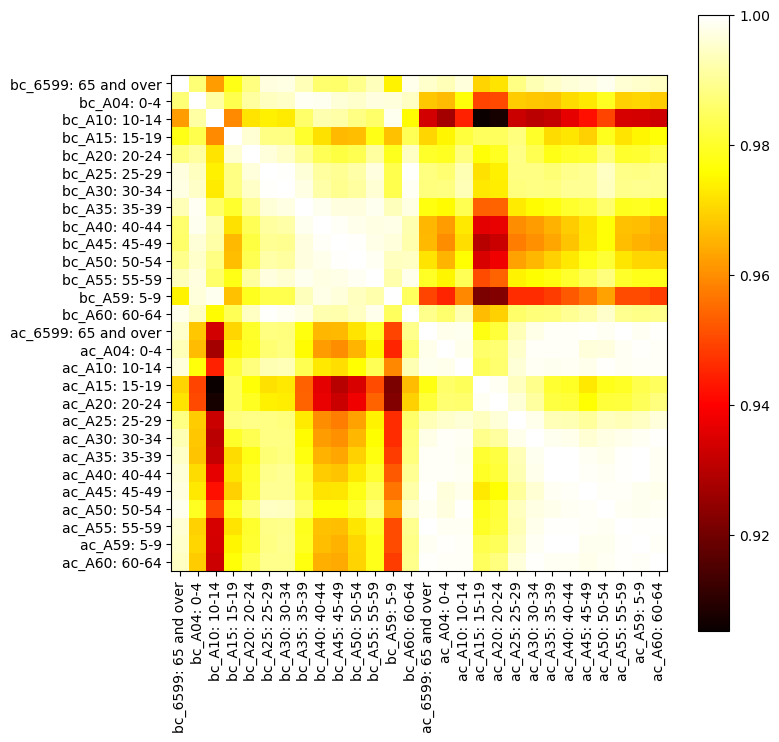

In [84]:
# heatmap to see correlation matrix (between different age brackets) before and after covid
plt.figure(figsize=(8, 8))
plt.imshow(correlation, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation = 90)
plt.yticks(range(len(correlation.index)), correlation.index)
plt.show()

If we compare age brackets before and after covid low correlation in the age brackets 10-14,40-44,45-49,5-9 while high correlationship in the age brackets 65 and over,25-29,30-34,50-54,55-59

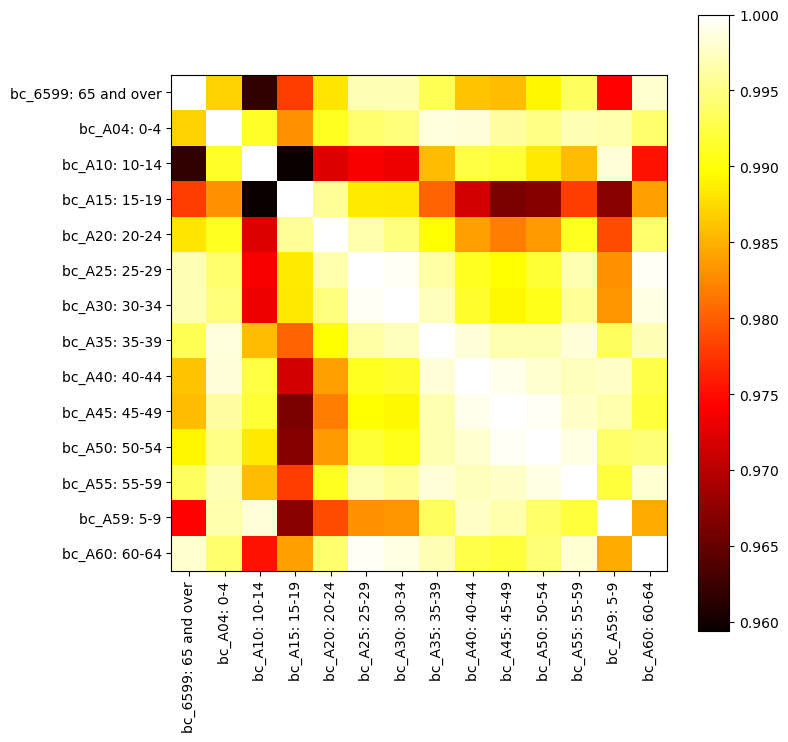

AGE: Age,bc_6599: 65 and over,bc_A04: 0-4,bc_A10: 10-14,bc_A15: 15-19,bc_A20: 20-24,bc_A25: 25-29,bc_A30: 30-34,bc_A35: 35-39,bc_A40: 40-44,bc_A45: 45-49,bc_A50: 50-54,bc_A55: 55-59,bc_A59: 5-9,bc_A60: 60-64
AGE: Age,,,,,,,,,,,,,,
bc_6599: 65 and over,1.000000,0.986845,0.961946,0.977841,0.988135,0.996839,0.997110,0.993030,0.986191,0.985722,0.989090,0.993402,0.974400,0.997997
bc_A04: 0-4,0.986845,1.000000,0.991414,0.983046,0.991021,0.994061,0.994474,0.998543,0.998301,0.996180,0.995001,0.996853,0.996596,0.994079
bc_A10: 10-14,0.961946,0.991414,1.000000,0.959425,0.972221,0.973951,0.973075,0.985701,0.992257,0.991837,0.988307,0.985595,0.998284,0.975402
bc_A15: 15-19,0.977841,0.983046,0.959425,1.000000,0.995861,0.988503,0.988371,0.980204,0.971611,0.966322,0.967027,0.977968,0.967203,0.983969
bc_A20: 20-24,0.988135,0.991021,0.972221,0.995861,1.000000,0.996566,0.994799,0.989752,0.983878,0.981929,0.983553,0.991087,0.978897,0.994129
bc_A25: 25-29,0.996839,0.994061,0.973951,0.988503,0.996566,1.000000,0.999393,0.996273,0.991009,0.989819,0.991813,0.996810,0.983126,0.999447
bc_A30: 30-34,0.997110,0.994474,0.973075,0.988371,0.994799,0.999393,1.000000,0.997154,0.991552,0.989302,0.990788,0.995789,0.983314,0.998885
bc_A35: 35-39,0.993030,0.998543,0.985701,0.980204,0.989752,0.996273,0.997154,1.000000,0.998408,0.996778,0.996678,0.998299,0.993431,0.997104
bc_A40: 40-44,0.986191,0.998301,0.992257,0.971611,0.983878,0.991009,0.991552,0.998408,1.000000,0.999183,0.998020,0.997238,0.997634,0.992582


In [85]:
#Correlation matrix and heatmap for before covid
corr_bc = age_before_covid_df.corr()
plt.figure(figsize=(8, 8))
plt.imshow(corr_bc, cmap='hot', interpolation='nearest')

plt.colorbar()
plt.xticks(range(len(corr_bc.columns)), corr_bc.columns, rotation = 90)
plt.yticks(range(len(corr_bc.index)), corr_bc.index)
plt.show()
corr_bc

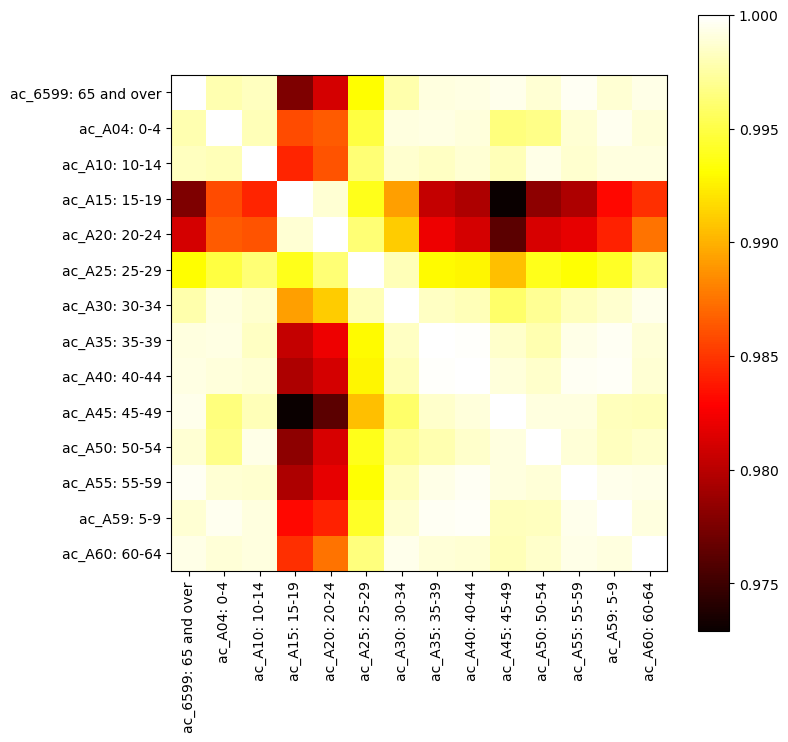

AGE: Age,ac_6599: 65 and over,ac_A04: 0-4,ac_A10: 10-14,ac_A15: 15-19,ac_A20: 20-24,ac_A25: 25-29,ac_A30: 30-34,ac_A35: 35-39,ac_A40: 40-44,ac_A45: 45-49,ac_A50: 50-54,ac_A55: 55-59,ac_A59: 5-9,ac_A60: 60-64
AGE: Age,,,,,,,,,,,,,,
ac_6599: 65 and over,1.000000,0.997809,0.998270,0.977665,0.981153,0.993032,0.997724,0.999100,0.999180,0.999451,0.998750,0.999645,0.998748,0.999261
ac_A04: 0-4,0.997809,1.000000,0.998064,0.985922,0.986539,0.994843,0.999150,0.999176,0.999013,0.996408,0.996741,0.998792,0.999492,0.998902
ac_A10: 10-14,0.998270,0.998064,1.000000,0.984298,0.986190,0.996237,0.998666,0.998377,0.998773,0.998060,0.999328,0.998631,0.999100,0.999085
ac_A15: 15-19,0.977665,0.985922,0.984298,1.000000,0.998760,0.993854,0.989265,0.980479,0.979563,0.972917,0.978271,0.979497,0.983113,0.984722
ac_A20: 20-24,0.981153,0.986539,0.986190,0.998760,1.000000,0.996240,0.991048,0.982129,0.981146,0.976289,0.981178,0.981852,0.984213,0.987421
ac_A25: 25-29,0.993032,0.994843,0.996237,0.993854,0.996240,1.000000,0.998013,0.993017,0.992761,0.990521,0.993840,0.993193,0.994177,0.996508
ac_A30: 30-34,0.997724,0.999150,0.998666,0.989265,0.991048,0.998013,1.000000,0.998309,0.998045,0.995920,0.997129,0.998106,0.998716,0.999438
ac_A35: 35-39,0.999100,0.999176,0.998377,0.980479,0.982129,0.993017,0.998309,1.000000,0.999844,0.998539,0.997834,0.999329,0.999654,0.998840
ac_A40: 40-44,0.999180,0.999013,0.998773,0.979563,0.981146,0.992761,0.998045,0.999844,1.000000,0.998984,0.998590,0.999602,0.999750,0.998836


In [86]:
# Correlation matrix and heatmap for after covid
corr_ac = age_after_covid_df.corr()
plt.figure(figsize=(8, 8))
plt.imshow(corr_ac, cmap='hot', interpolation='nearest')

plt.colorbar()
plt.xticks(range(len(corr_ac.columns)), corr_ac.columns, rotation = 90)
plt.yticks(range(len(corr_ac.index)), corr_ac.index)
plt.show()
corr_ac

In [87]:
# Create new pivot tables containing breakdown of different age brackets and gender before covid and after covid
before_covid = updated_age_gender_df.loc[updated_age_gender_df['TIME_PERIOD: Time Period'] <= 2020]
after_covid = updated_age_gender_df.loc[updated_age_gender_df['TIME_PERIOD: Time Period'] > 2020]

before_covid_table = pd.pivot_table(before_covid, values='OBS_VALUE', index=['REGION: Region', 'AGE: Age'], columns=['SEX: Sex'], aggfunc=np.mean)
after_covid_table = pd.pivot_table(after_covid, values='OBS_VALUE', index=['REGION: Region', 'AGE: Age'], columns=['SEX: Sex'], aggfunc=np.mean)

In [88]:
# Calculate male-female ratio per region for before covid
before_covid_table['male_female_ratio'] = before_covid_table['1: Males']/before_covid_table['2: Females']
before_covid_table

SEX: Sex                                            1: Males  2: Females  \
REGION: Region                  AGE: Age                                   
1: New South Wales              6599: 65 and over   2529.375    2685.625   
                                A04: 0-4            4489.375    4248.125   
                                A10: 10-14          2698.125    2530.000   
                                A15: 15-19          7859.375    6885.000   
                                A20: 20-24         16513.125   16343.750   
                                A25: 25-29         16048.125   16680.625   
                                A30: 30-34         10138.125    9582.500   
                                A35: 35-39          6113.125    5478.125   
                                A40: 40-44          4010.000    3545.000   
                                A45: 45-49          2730.625    2390.625   
                                A50: 50-54          1922.500    1956.250   
                                A55: 55-59          1568.750    1964.375   
                                A59: 5-9            3391.250    3230.625   
                                A60: 60-64          1471.875    1750.625   
2: Victoria                     6599: 65 and over   1621.875    1781.250   
                                A04: 0-4            3624.375    3420.625   
                                A10: 10-14          2327.500    2193.125   
                                A15: 15-19          7046.250    6209.375   
                                A20: 20-24         14539.375   12845.625   
                                A25: 25-29         11746.875   12603.125   
                                A30: 30-34          7393.125    7187.500   
                                A35: 35-39          4465.625    4163.125   
                                A40: 40-44          2951.875    2778.750   
                                A45: 45-49          1955.000    1818.750   
                                A50: 50-54          1336.250    1431.875   
                                A55: 55-59          1122.500    1469.375   
                                A59: 5-9            2781.250    2633.750   
                                A60: 60-64          1036.250    1269.375   
3: Queensland                   6599: 65 and over   1231.250    1170.625   
                                A04: 0-4            2611.250    2491.250   
                                A10: 10-14          1996.875    1870.625   
                                A15: 15-19          3615.625    3346.250   
                                A20: 20-24          8876.250    8386.875   
                                A25: 25-29          8136.250    8318.750   
                                A30: 30-34          4894.375    4672.500   
                                A35: 35-39          3311.875    3043.750   
                                A40: 40-44          2396.250    2155.000   
                                A45: 45-49          1710.000    1490.625   
                                A50: 50-54          1227.500    1141.875   
                                A55: 55-59          1023.750    1013.750   
                                A59: 5-9            2268.750    2160.625   
                                A60: 60-64           852.500     812.500   
4: South Australia              6599: 65 and over    293.125     310.625   
                                A04: 0-4             799.375     758.125   
                                A10: 10-14           595.625     548.750   
                                A15: 15-19          1335.000    1196.250   
                                A20: 20-24          2105.000    2067.500   
                                A25: 25-29          1860.000    2085.000   
                                A30: 30-34          1405.000    1429.375   
                                A35: 35-39           999.375     953.125   
                                A40: 40-44      

In [89]:
# calculate male-female ratio for after covid pivot table
after_covid_table['male_female_ratio'] = after_covid_table['1: Males']/after_covid_table['2: Females']
after_covid_table

SEX: Sex                                           1: Males  2: Females  \
REGION: Region                  AGE: Age                                  
1: New South Wales              6599: 65 and over      2630        2680   
                                A04: 0-4               3335        3170   
                                A10: 10-14             2310        2125   
                                A15: 15-19             4530        3770   
                                A20: 20-24            10005        8520   
                                A25: 25-29             8395        9025   
                                A30: 30-34             6535        6780   
                                A35: 35-39             4760        4505   
                                A40: 40-44             3205        2985   
                                A45: 45-49             2030        1930   
                                A50: 50-54             1530        1670   
                                A55: 55-59             1345        1705   
                                A59: 5-9               2925        2815   
                                A60: 60-64             1355        1635   
2: Victoria                     6599: 65 and over      1560        1635   
                                A04: 0-4               2090        2015   
                                A10: 10-14             1510        1435   
                                A15: 15-19             3255        3225   
                                A20: 20-24             7400        6900   
                                A25: 25-29             5880        6760   
                                A30: 30-34             4235        4580   
                                A35: 35-39             2895        2770   
                                A40: 40-44             1960        1855   
                                A45: 45-49             1225        1170   
                                A50: 50-54              965        1110   
                                A55: 55-59              755        1115   
                                A59: 5-9               1875        1735   
                                A60: 60-64              780        1125   
3: Queensland                   6599: 65 and over      1105        1030   
                                A04: 0-4               1200        1140   
                                A10: 10-14              940         940   
                                A15: 15-19             1245        1295   
                                A20: 20-24             3155        3085   
                                A25: 25-29             3420        3515   
                                A30: 30-34             2660        2435   
                                A35: 35-39             1920        1720   
                                A40: 40-44             1265        1210   
                                A45: 45-49              920         805   
                                A50: 50-54              710         700   
                                A55: 55-59              575         625   
                                A59: 5-9               1170        1070   
                                A60: 60-64              560         605   
4: South Australia              6599: 65 and over       245         240   
                                A04: 0-4                390         400   
                                A10: 10-14              305         315   
                                A15: 15-19              630         570   
                                A20: 20-24             1210        1030   
                                A25: 25-29             1060        1075   
                                A30: 30-34              845         815   
                                A35: 35-39              655         635   
                                A40: 40-44              440         390   
                         

In [90]:
#Calculate the difference between before and after covid male-female ratio
difference = after_covid_table -before_covid_table
difference = difference.reset_index()
difference = difference[difference['REGION: Region'] != 'AUS: Australia']
pd.set_option('display.max_rows', None)
difference

SEX: Sex,REGION: Region,AGE: Age,1: Males,2: Females,male_female_ratio
0,1: New South Wales,6599: 65 and over,100.625,-5.625,0.039523
1,1: New South Wales,A04: 0-4,-1154.375,-1078.125,-0.004739
2,1: New South Wales,A10: 10-14,-388.125,-405.000,0.020606
3,1: New South Wales,A15: 15-19,-3329.375,-3115.000,0.060070
4,1: New South Wales,A20: 20-24,-6508.125,-7823.750,0.163932
5,1: New South Wales,A25: 25-29,-7653.125,-7655.625,-0.031888
6,1: New South Wales,A30: 30-34,-3603.125,-2802.500,-0.094119
7,1: New South Wales,A35: 35-39,-1353.125,-973.125,-0.059312
8,1: New South Wales,A40: 40-44,-805.000,-560.000,-0.057469
9,1: New South Wales,A45: 45-49,-700.625,-460.625,-0.090409


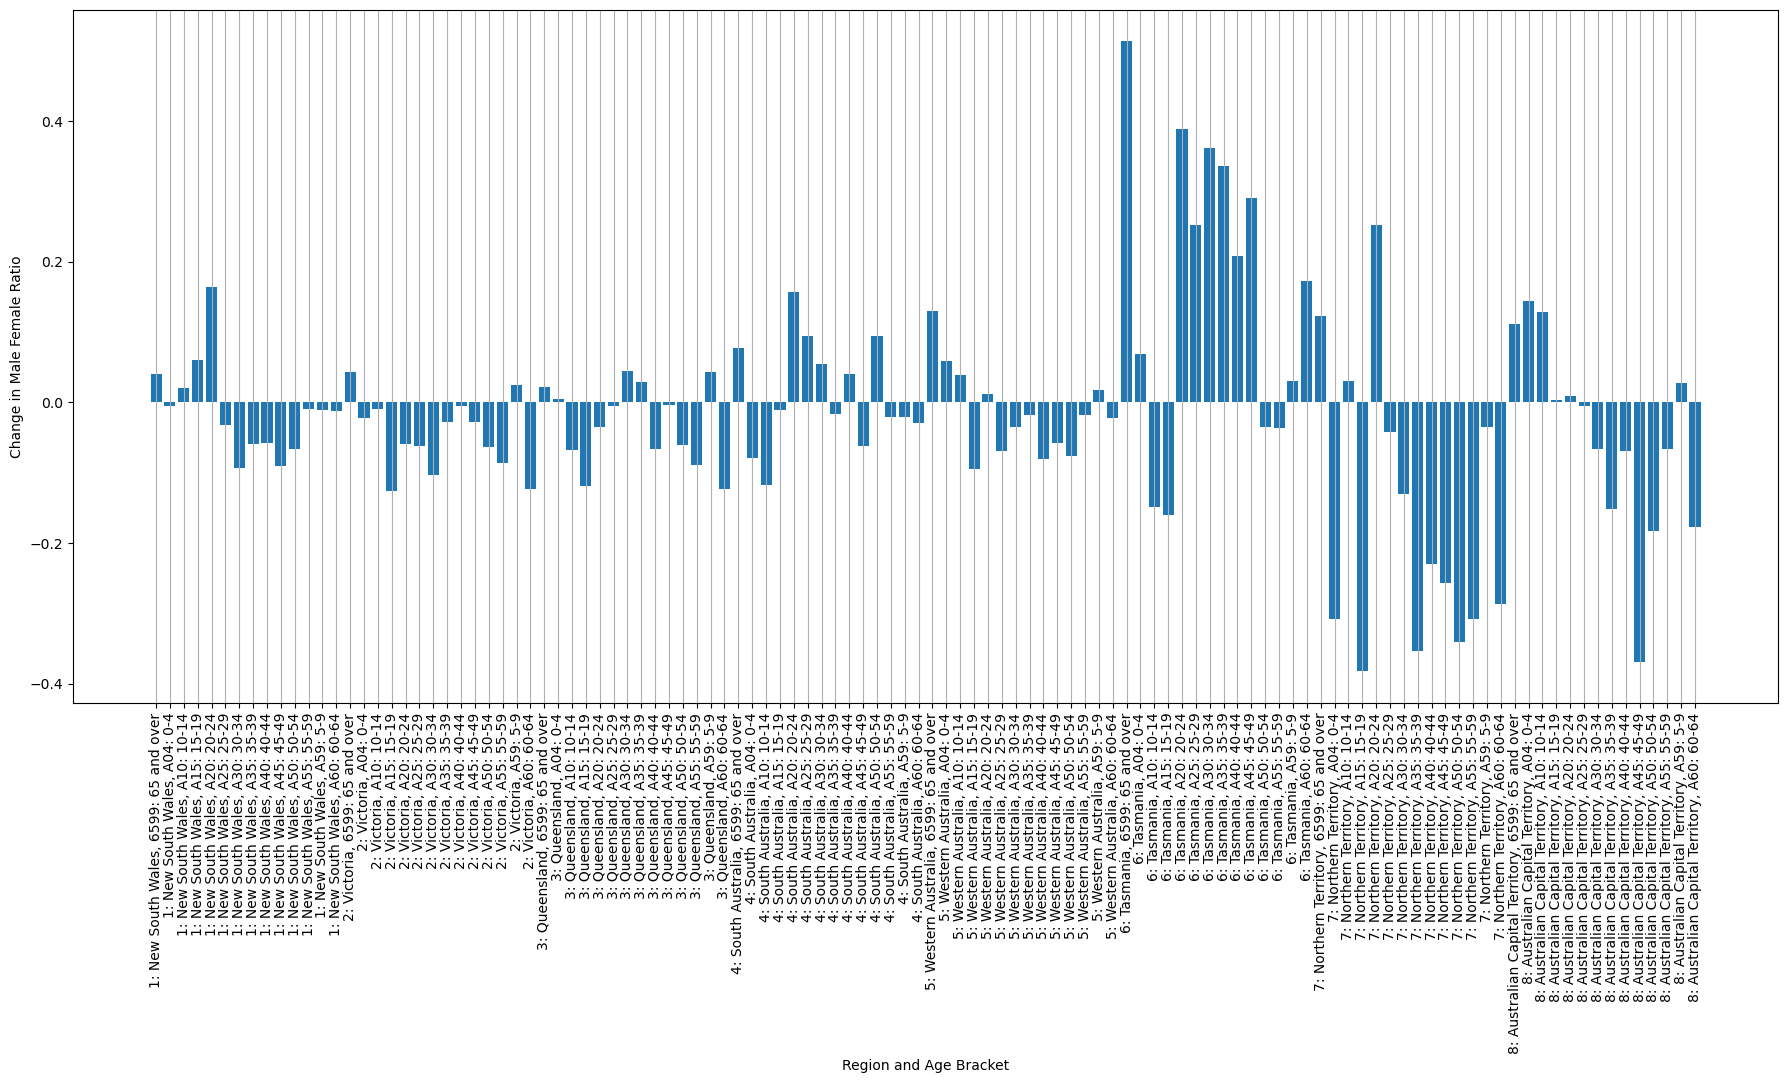

In [91]:
# Plot bar graph to display the change in male-female ratio entering per region before and after covid and broken down between different age brackets
difference = difference.loc[:, ['REGION: Region', 'AGE: Age', 'male_female_ratio']]

plt.figure(figsize=(22, 9))
plt.bar(x=difference['REGION: Region'] + ', ' + difference['AGE: Age'], height=difference['male_female_ratio'])
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.ylabel('Change in Male Female Ratio')
plt.xlabel('Region and Age Bracket')
plt.show()
